In [138]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.applications import vgg16
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img  # DATA AUGMNETATION
import keras
from keras import Model
from keras.applications.vgg16 import decode_predictions
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions
from keras.applications.resnet50 import ResNet50,decode_predictions

import pandas as pd
from IPython.display import Image,display

In [2]:
os.chdir('C:/Users/anish_yagt7hg/Documents/images')


In [110]:
path=os.getcwd()

In [111]:
path

'C:\\Users\\anish_yagt7hg\\Documents\\images'

In [139]:
images_folder =[os.path.join(path,i ) for i in  os.listdir()]
images_folder

['C:\\Users\\anish_yagt7hg\\Documents\\images\\adorable-white-pomeranian-puppy-spitz-921029690-5c8be25d46e0fb000172effe.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\cute-puppy-body-image.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\dc_neighborhood_news-8.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\images.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\images_(1).jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0010.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0021.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0027.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0040.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0046.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0053.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0137.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0161.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\istockphoto-157375891-1024x1024.jpg',
 '

In [14]:
len(images_folder)

16

#### DISPLAYING IMAGES IN THE IMAGES FOLDER

In [33]:
def show_images(images):
    data=[]
    for i in images:
           data.append(img_to_array(load_img(i)))
    for i in range(len(data)):
            data[i]=data[i]/255
        
    plt.figure(figsize=(10,10)) # specifying the overall grid size

    for i in range(16):
        plt.subplot(4,4,i+1)    
        plt.imshow(data[i])

    plt.show()
            

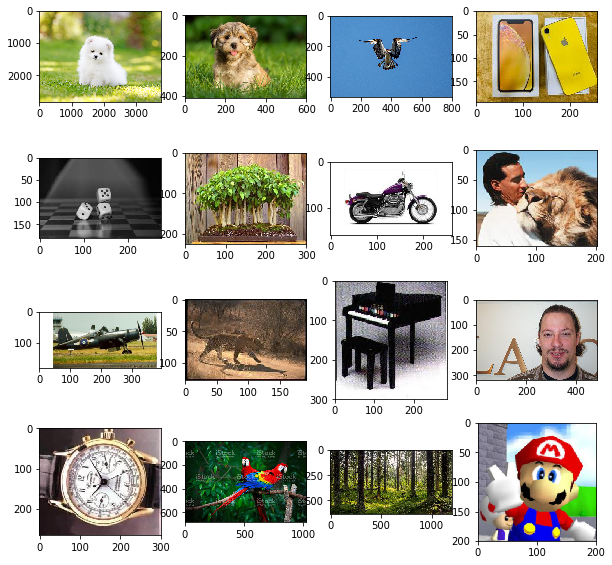

In [36]:
show_images(images_folder)

#### CUSTOM FUNCTION FOR VGG16 MODEL PREDICTION

In [14]:
def read_image(data):
    dim=(224,224)
    for img in range(len(data)):
        data[img] = img_to_array(load_img(data[img]))     # REDAING IMAGES IN RGB MODE
        data[img] =cv2.resize(data[img],dim)    # RESIZING IMAGE INTO (224 x 224) 
    return np.array(data)
    
    

In [18]:
data = read_image(images_folder)

#### VGG MODEL

In [12]:
vgg = vgg16.VGG16(include_top=True, weights='imagenet', 
                                     input_shape=None,classes=1000)
vgg.trainable = False
for layer in vgg.layers:
    layer.trainable = False


Instructions for updating:
Colocations handled automatically by placer.


In [46]:
predictions = vgg.predict(data)

In [51]:
predictions=decode_predictions(predictions)

In [54]:
pred_labels=[]
for i in range(len(predictions)):
    pred_labels.append(predictions[i][0])

In [150]:
labels=[(y) for (x,y,z) in pred_labels] # unpacking the tuple values

In [155]:
labels         # predictions of vgg model

['Maltese_dog',
 'Tibetan_terrier',
 'little_blue_heron',
 'cleaver',
 'saltshaker',
 'pot',
 'moped',
 'pug',
 'warplane',
 'book_jacket',
 'dining_table',
 'hair_spray',
 'stopwatch',
 'European_gallinule',
 'shower_curtain',
 'toyshop']

In [93]:
def display_img(image,label):
    img =img_to_array(load_img(image))
    img=img/255
    show=plt.imshow(img)
    print(label)
    return show

('Maltese_dog', 0.79382557)


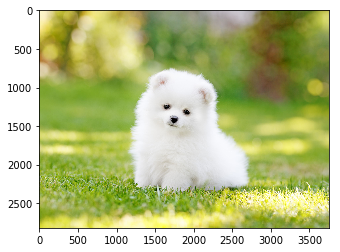

In [94]:
display_img(images_folder[0],labels[0])

#### INCEPTION MODEL

In [97]:
inception_model = InceptionV3(include_top=True,weights='imagenet',classes=1000)
inception_model.trainable = False
for layer in inception_model.layers:
    layer.trainable = False


#### CUSTOM FUNCTION AS INCEPTION MODEL EXPECTS (299 X 299) IMAGE)

In [107]:
def read_image_inception(data):
    dim=(299,299)
    for img in range(len(data)):
        data[img] = img_to_array(load_img(data[img]))     # REDAING IMAGES IN RGB MODE
        data[img] =cv2.resize(data[img],dim)    # RESIZING IMAGE INTO (224 x 224) 
        data[img]=data[img]/255
    return np.array(data)
    

In [113]:
data1= read_image_inception(images_folder)

In [114]:
inception_predictions= inception_model.predict(data1)

In [115]:
inception_predictions=decode_predictions(inception_predictions)  # DECODING PREDICTIONS

In [116]:
pred_labels2=[]
for i in range(len(inception_predictions)):
    pred_labels2.append(inception_predictions[i][0])

In [ ]:
labels2=[(y) for (x,y,z) in pred_labels2]    # UNPACKING VALUES

In [149]:
labels2

['Pomeranian',
 'Lhasa',
 'kite',
 'cleaver',
 'ocarina',
 'pot',
 'moped',
 'lion',
 'warplane',
 'grey_fox',
 'dining_table',
 'suit',
 'stopwatch',
 'macaw',
 'maze',
 'mortarboard']

#### RESNET MODEL

In [125]:
resnet=ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)
resnet.trainable = False
for layer in resnet.layers:
    layer.trainable = False


102858752/102853048 [==============================] - 183s 2us/step


In [127]:
data2 =read_image(images_folder)

In [133]:
resnet_predictions=resnet.predict(data2)

In [134]:
resnet_predictions=decode_predictions(resnet_predictions)

In [135]:
pred_labels3=[]
for i in range(len(inception_predictions)):
    pred_labels3.append(inception_predictions[i][0])

In [146]:
labels3=[(y) for (x,y,z) in pred_labels3]

In [147]:
labels3

['Pomeranian',
 'Lhasa',
 'kite',
 'cleaver',
 'ocarina',
 'pot',
 'moped',
 'lion',
 'warplane',
 'grey_fox',
 'dining_table',
 'suit',
 'stopwatch',
 'macaw',
 'maze',
 'mortarboard']

In [153]:
images_folder

['C:\\Users\\anish_yagt7hg\\Documents\\images\\adorable-white-pomeranian-puppy-spitz-921029690-5c8be25d46e0fb000172effe.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\cute-puppy-body-image.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\dc_neighborhood_news-8.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\images.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\images_(1).jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0010.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0021.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0027.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0040.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0046.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0053.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0137.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\image_0161.jpg',
 'C:\\Users\\anish_yagt7hg\\Documents\\images\\istockphoto-157375891-1024x1024.jpg',
 '

#### CREATING A DATAFRAME OUT OF ALL PREDICTED LABELS

In [158]:
predictions_dataframe =pd.DataFrame(list(zip(images_folder,labels,labels2,labels3)),columns=['Image_path','vgg_predictions',
                                                                                  'inception_v3_predictions','resnet_predictions'])

In [159]:
predictions_dataframe

,Image_path,vgg_predictions,inception_v3_predictions,resnet_predictions
0,C:\Users\anish_yagt7hg\Documents\images\adorab...,Maltese_dog,Pomeranian,Pomeranian
1,C:\Users\anish_yagt7hg\Documents\images\cute-p...,Tibetan_terrier,Lhasa,Lhasa
2,C:\Users\anish_yagt7hg\Documents\images\dc_nei...,little_blue_heron,kite,kite
3,C:\Users\anish_yagt7hg\Documents\images\images...,cleaver,cleaver,cleaver
4,C:\Users\anish_yagt7hg\Documents\images\images...,saltshaker,ocarina,ocarina
5,C:\Users\anish_yagt7hg\Documents\images\image_...,pot,pot,pot
6,C:\Users\anish_yagt7hg\Documents\images\image_...,moped,moped,moped
7,C:\Users\anish_yagt7hg\Documents\images\image_...,pug,lion,lion
8,C:\Users\anish_yagt7hg\Documents\images\image_...,warplane,warplane,warplane
9,C:\Users\anish_yagt7hg\Documents\images\image_...,book_jacket,grey_fox,grey_fox
